In [31]:
#load the required packages
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import seaborn as sns
import math
import pandas as pd

%matplotlib inline 

In [32]:
#load the dataset and check the first 5 rows
dataset = pd.read_csv('final dataset')
dataset.head()

,customer_id,title,first_name,middle_name,last_name,suffix,address_line_1,address_line_2,city,state_province_name,...,occupation,gender,marital_status,home_owner,number_of_cars_owned,number_of_children_at_home,total_children,yearly_income,average_monthly_expense,bike_buyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,4.488636,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,4.762174,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,4.812184,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,3.912023,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,4.553877,1


In [82]:
x = dataset.number_of_cars_owned
y = dataset.average_monthly_expense

In [83]:
#Randomly split the data so that one half can be used to train the data while the other half can be used to test it
nr.seed(9988)
indx = range(len(x))
indx = ms.train_test_split(indx, test_size = 8235)
x_train = np.ravel(x[indx[0]])
y_train = np.ravel(y[indx[0]])
x_test = np.ravel(x[indx[1]])
y_test = np.ravel(y[indx[1]])

In [84]:
#Scale the feature
scaler = preprocessing.StandardScaler().fit(x_train.reshape(-1,1))
x_train = scaler.transform(x_train.reshape(-1, 1))
y_train = scaler.transform(y_train.reshape(-1, 1))

In [85]:
#define and fit linear regression model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [86]:
#Check the intercept and the steepness of the curve
print(lin_mod.intercept_)
print(lin_mod.coef_)

[2.41173535]
[[0.09244049]]


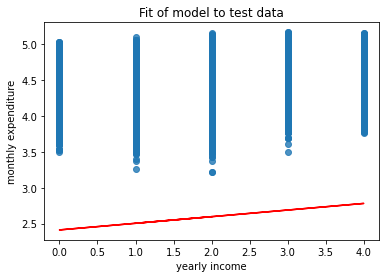

In [87]:
#plot the regression model to find the trend
def plot_regression(x, y_score, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_score, c = 'red')
    plt.xlabel('yearly income')
    plt.ylabel('monthly expenditure')
    plt.title('Fit of model to test data')

y_score = lin_mod.predict(x_test.reshape(-1,1)) 

plot_regression(x_test, y_score, y_test)

In [88]:
#find the errors in the model 
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (y_true.shape[0] - 1)/(y_true.shape[0] - n_parameters - 1) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
print_metrics(y_test, y_score, 2)    

Mean Square Error      = 2.899292474844867
Root Mean Square Error = 1.702730887382051
Mean Absolute Error    = 1.670760173461608
Median Absolute Error  = 1.6660635518577251
R^2                    = -23.238178256126883
Adjusted R^2           = -47.4822452824812


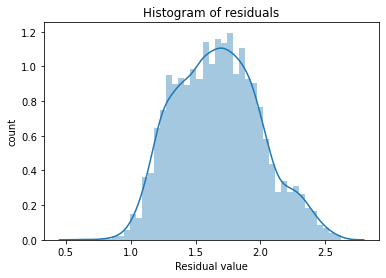

In [89]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

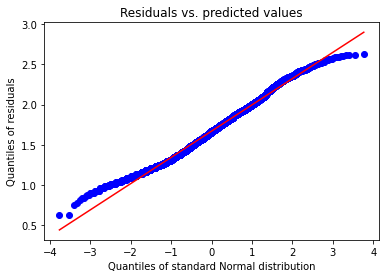

In [90]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Quantiles of standard Normal distribution')
    plt.ylabel('Quantiles of residuals')
    
resid_qq(y_test, y_score)    

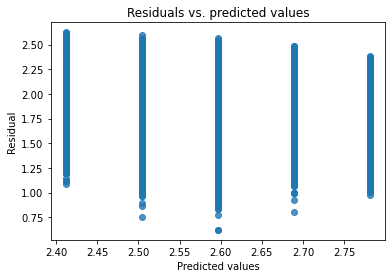

In [91]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_plot(y_test, y_score)    